In [1]:
import numpy as np
import statmapper as stm
from sklearn_tda import MapperComplex
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import AgglomerativeClustering

""" 
Slight change needed to /path_to_python/site-packages/sklearn_tda/vector_methods.py 
Should be:
from sklearn.metrics import DistanceMetric
"""


' \nSlight change needed to /path_to_python/site-packages/sklearn_tda/vector_methods.py \nShould be:\nfrom sklearn.metrics import DistanceMetric\n'

Load data.

In [2]:
X = np.loadtxt("human")

Compute Mapper with `sklearn_tda`

In [3]:
params = {"filters": X[:,2:3], "filter_bnds": np.array([[np.nan,np.nan]]), "colors": X, 
          "resolutions": np.array([24]), "gains": np.array([0.3]), "inp": "point cloud", 
          "clustering": AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=.1)}

In [9]:
M = MapperComplex(**params).fit(X)

Print Mapper to `.dot` file that can then be processed with the open source [`graphviz`](https://www.graphviz.org/) library.

In [10]:
stm.print_to_dot(M)

Display Mapper with `networkx` library.

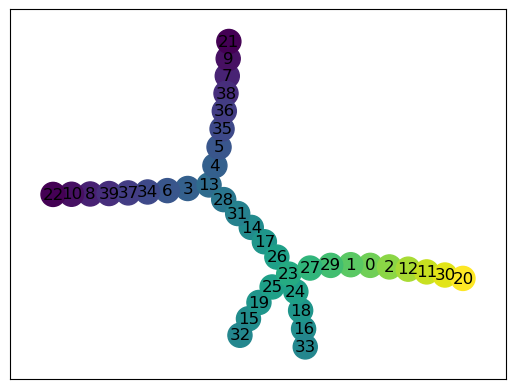

In [26]:
""" 
G = stm.mapper2networkx(M)
nx.draw(G, pos=nx.kamada_kawai_layout(G), 
        node_color=[M.node_info_[node]["colors"][2] for node in G.nodes()])
plt.show()
"""

""" Error with code above """

G = stm.mapper2networkx(M)
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),
                 node_color=[M.node_info_[node]["colors"][2] for node in G.nodes()])
plt.show()

Define function and topological feature type with which we will compute persistence on the Mapper. In the cell below, the function is defined as the 3rd coordinate of the point cloud and the feature type is downward branch.

In [27]:
function = X[:,2]
topo = "downbranch"

Compute downbranches and their representative nodes.

In [28]:
dgm, bnd = stm.compute_topological_features(M, function, "data", topo)

In [29]:
print(dgm, bnd)

[(0, (-0.9507080212765957, -0.34431731)), (0, (-0.149795, 0.10663081126760564)), (0, (-0.1503045, 0.10663081126760564)), (0, (-0.9507271148936169, 0.7770898208333333))] [[22, 10, 8, 39, 37, 34, 6, 3, 13], [33, 16, 18, 24, 23], [32, 15, 19, 25, 23], [21, 9, 7, 38, 36, 35, 5, 4, 13, 28, 31, 14, 17, 26, 23, 27, 29, 1, 0, 2, 12, 11, 30, 20, 20]]


TypeError: '_AxesStack' object is not callable

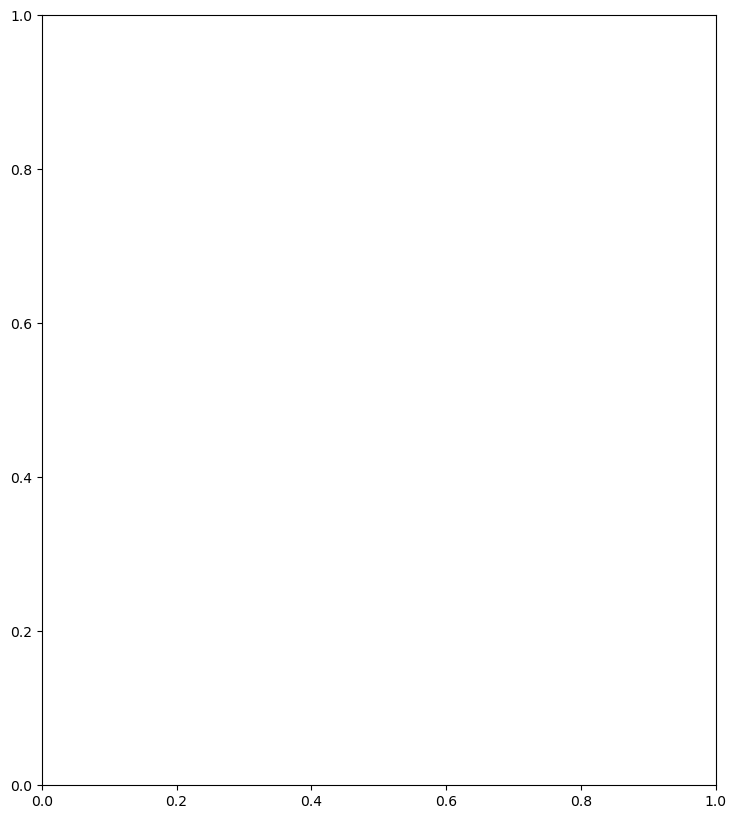

In [20]:
""" 
G = stm.mapper2networkx(M)
plt.figure(figsize=(40,10))
for idx, bd in enumerate(bnd):
    plt.subplot(1,len(bnd),idx+1)
    nx.draw(G, pos=nx.kamada_kawai_layout(G), 
            node_color=[1 if node in bd else 0 for node in G.nodes()])
plt.show()

"""

G = stm.mapper2networkx(M)
plt.figure(figsize=(40,10))
for idx, bd in enumerate(bnd):
    plt.subplot(1,len(bnd),idx+1)
    nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), 
            node_color=[1 if node in bd else 0 for node in G.nodes()])
plt.show()

Filter downbranches with significance less than 90% with 100-bootstrap.

In [ ]:
confidence = 0.90
bootstrap  = 100

In [ ]:
sdgm, sbnd = stm.evaluate_significance(dgm, bnd, X, M, function, params, topo, confidence, bootstrap)

In [ ]:
print(sdgm, sbnd)

Sort coordinates with respect to their ability to differentiate the first significant downbranch from the rest of the Mapper nodes.

In [ ]:
features, pv = stm.compute_DE_features(X, M, sbnd[0])

In [ ]:
print(features, pv)